In [10]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [11]:
from urllib.request import urlretrieve
urlretrieve(URL,'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x2372615bd88>)

In [12]:
import pandas as pd
data = pd.read_csv("Fremont.csv", index_col = "Date", parse_dates = True) 
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


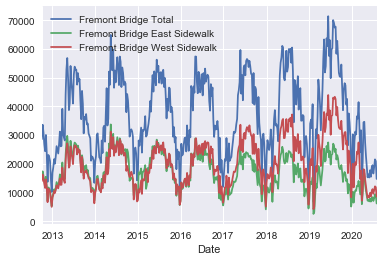

In [13]:
%matplotlib inline
data.resample('W').sum().plot();

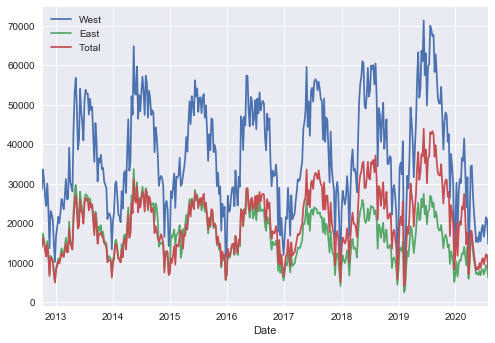

In [14]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
data.columns = ["West", "East", "Total"]
data.resample('W').sum().plot()

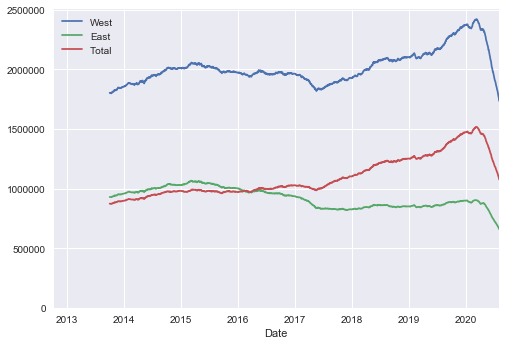

In [15]:
ax = data.resample("D").sum().rolling(365).sum().plot()
ax.set_ylim(0,None);

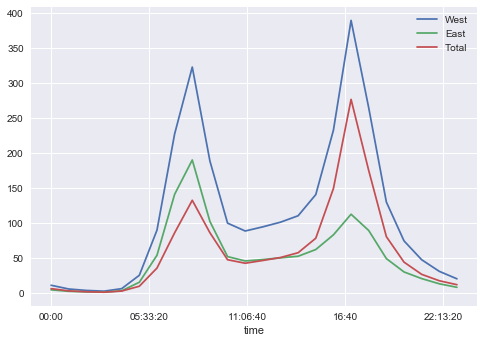

In [16]:
data.groupby(data.index.time).mean().plot()

In [17]:
pivoted = data.pivot_table(index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

East                                            
         2012-10-03 2012-10-04 2012-10-05 2012-10-06 2012-10-07
00:00:00        4.0        7.0        4.0        8.0        6.0
01:00:00        4.0        3.0        4.0       10.0       12.0
02:00:00        1.0        3.0        4.0        7.0        2.0
03:00:00        2.0        0.0        2.0        1.0        4.0
04:00:00        6.0        7.0        7.0        4.0        1.0

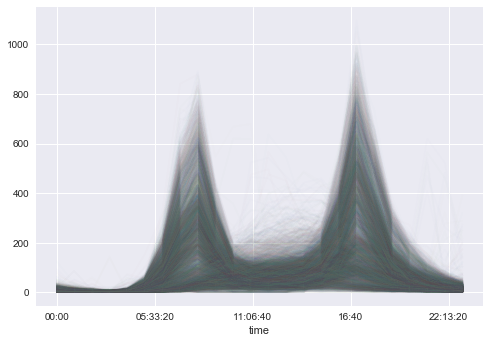

In [18]:
pivoted.plot(legend=False, alpha=0.01)